<a href="https://colab.research.google.com/github/Jahnic/jahnic.github.io/blob/master/Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![banner](banner.png)

# Analysis of Olist, a Brazilian e-commerce service provider

**Definition of questions and hypotheses**

*	Which product categories do high-value consumers prefer?
*	Do high-value consumers cluster in certain regions?
  *	Hypothesis: regional economic strength correlates with high-value consumer density.
*	Can we identify consumers with high buying power despite low spending?
  *	Hypothesis: consumers that shop high quality products without using instalments have high spending power.
  *	What are they buying and why aren’t they spending more frequently?
  *Note: This question cannot be answered by this data set, since the average costumer has less than 2 orders. Direct access to Olists data-base required.
*	How are high value sellers distributed? 
*	Do large or heavy items make up a large segment of sales? If so, why? What are advantages of buying them online? Competitive delivery costs?
*	Is there considerable variation in delivery times per distance?
  *	Hypothesis 1: size and weight of products are factors. 
  *	Hypothesis 2: performance differences between carriers/regions exist.
*	Are freight values justified?
  *	Hypothesis: freight values equalize after accounting for order size, weight, and delivery distance. If not, changing some of the logistical partnerships may be advisable.
*	How long do individual sellers take in average to forward an order to the appropriate carrier? 
  *	How does this relate to the average amount of orders that the same sellers handle? 
*	Which sellers perform best/worst in terms of review scores and messages?
*	Which products perform best/worst in terms of review scores and messages?
*	How much time passes from order purchase to order approval?
  *	Hypothesis: Performance differences between payment types and marketplaces

*	How do orders of the same price category compare with and without the option of payment installments? 
  *	Which number of instalments appear to work best?
* How does the demand for a certain product category change depending on the date or season?
  *Hypothesis: Seasonal and holiday specific changes will emerge.

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
from datetime import datetime

In [0]:
cust = files.upload()
geoloc = files.upload()
items = files.upload()
payments = files.upload()
review = files.upload()
orders = files.upload()
products = files.upload()
sellers = files.upload()
category = files.upload()

Saving olist_customers_dataset.csv to olist_customers_dataset.csv


Saving olist_geolocation_dataset.csv to olist_geolocation_dataset.csv


Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv


Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv


Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv


Saving olist_orders_dataset.csv to olist_orders_dataset.csv


Saving olist_products_dataset.csv to olist_products_dataset.csv


Saving olist_sellers_dataset.csv to olist_sellers_dataset.csv


Saving product_category_name_translation.csv to product_category_name_translation.csv


In [0]:
customers = pd.read_csv(io.BytesIO(cust['olist_customers_dataset.csv']))
geolocation = pd.read_csv(io.BytesIO(geoloc['olist_geolocation_dataset.csv']))
order_itmes = pd.read_csv(io.BytesIO(items['olist_order_items_dataset.csv']))
order_payments = pd.read_csv(io.BytesIO(payments['olist_order_payments_dataset.csv']))
order_reviews = pd.read_csv(io.BytesIO(review['olist_order_reviews_dataset.csv']))
order = pd.read_csv(io.BytesIO(orders['olist_orders_dataset.csv']))
product = pd.read_csv(io.BytesIO(products['olist_products_dataset.csv']))
seller = pd.read_csv(io.BytesIO(sellers['olist_sellers_dataset.csv']))
product_category = pd.read_csv(io.BytesIO(category['product_category_name_translation.csv']))

# Exploration of data-sets


**Exploratory analysis**

The data contains information on 99,441 orders placed by 96,096 unique customers between 2016-09-04 and 2018-10-17. A total of 32,951 items are placed by 3095 registered retailers and categorized into 71 product categories.
Since the number of customers is close to the number of orders, most of the data is derived from consumers making only a single purchase. More complete data is necessary for adequate analysis.
For some states, the number of customers and sellers are not proportional (Figure 1). For example, Rio de Janeiro has the 2nd highest number of customers but only the 5th highest number of sellers. Proportional numbers would be preferred to meet local demands and consequently minimize delivery times. Further investigations are necessary to account for the varying demands for individual sellers as well as varying consumer spending in different states.

In [0]:
#Customers summaries
print(customers.info(), '\n')
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Number of unique customers:  96096 



Text(0.5, 1.0, 'Seller distribution across states')

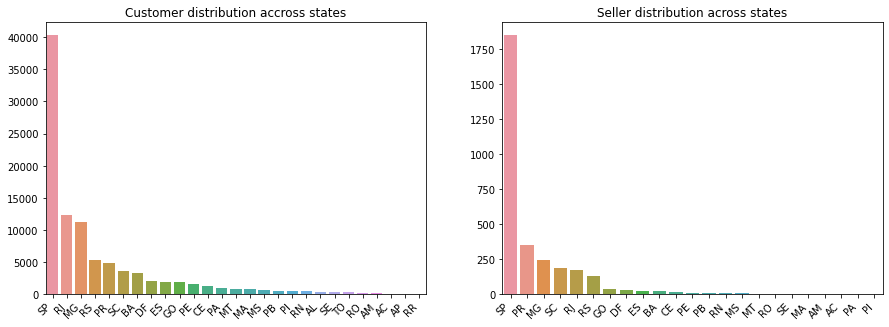

In [0]:
#Distribution of customers across states
fig = plt.figure(figsize=(15,5))

#Delete duplicate customer entries
unique_customers = customers.loc[customers['customer_unique_id'].drop_duplicates().index]
print('Number of unique customers: ', unique_customers.shape[0], '\n')

#Plot unique customer entries accross state
fig.add_subplot(1,2,1)
#sns.barplot(unique_customers['customer_state'].value_counts().keys().tolist(), unique_customers['customer_state'].value_counts().tolist())
sns.barplot(x = unique_customers['customer_state'].value_counts().keys(), y = unique_customers['customer_state'].value_counts().tolist())
plt.xticks(rotation=45, ha='right')
plt.title('Customer distribution accross states')

#Plot of sellers accross states
fig.add_subplot(1,2,2)
sns.barplot(seller['seller_state'].value_counts().keys(), seller['seller_state'].value_counts().tolist())
plt.xticks(rotation=45, ha='right')
plt.title('Seller distribution across states')

There are 96096 unique customers and 99441 orders. This implies that most customers have placed only a single order during the entire period of data collection. 

In [0]:
unique_customers['customer_state'].value_counts()

In [0]:
"print(geolocation.info())
geolocation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [0]:
print(order_itmes.info())
order_itmes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [0]:
#Basic statistical summary of orders
order_itmes.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [0]:
#Basic summary of payments
print(order_payments.info())
order_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Text(0, 0.5, 'Count')

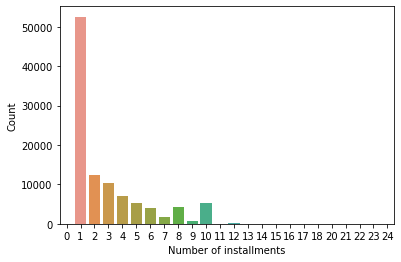

In [0]:
#Distribution of payment installmetns 
sns.barplot(order_payments['payment_installments'].value_counts().keys(), order_payments['payment_installments'].value_counts().tolist())
plt.xlabel('Number of installments')
plt.ylabel('Count')

In [0]:
#Price distribtution per payment installments
sns.boxplot(order_payments['payment_installments'], order_payments[''])

In [0]:
#List of accepted payment types
print(order_payments['payment_type'].drop_duplicates())

0        credit_card
9             boleto
25           voucher
85        debit_card
51280    not_defined
Name: payment_type, dtype: object


Text(0.5, 0, 'Payment type')

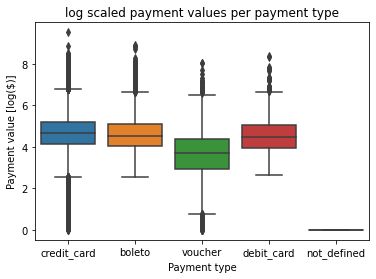

In [0]:
#Log transformed payment values per payment type
sns.boxplot(order_payments['payment_type'],
            [math.log(x+1) for x in order_payments['payment_value']])
plt.title('log scaled payment values per payment type')
plt.ylabel('Payment value [log($)]')
plt.xlabel('Payment type')

In [0]:
#Basic statistical summary on payments
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [0]:
#Basic overview of reviews
order_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


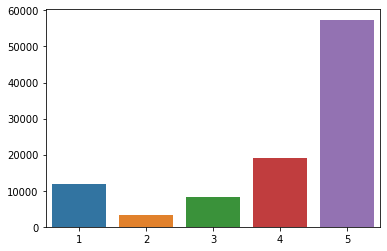

In [0]:
#Distribution of review scores
sns.barplot(order_reviews['review_score'].value_counts().keys().tolist(), 
            order_reviews['review_score'].value_counts().tolist())

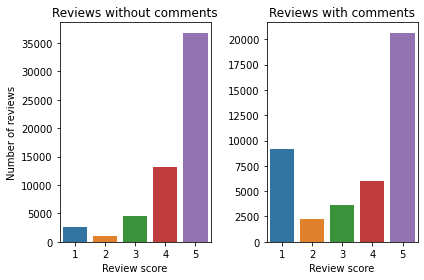

In [0]:
#Distrubtion of review scores when comments are not supplied
review_no_comments = order_reviews[order_reviews['review_comment_message'].isna()]
review_comments = order_reviews[order_reviews['review_comment_message'].isna() == False]

#Plot review scores that had no comments
plt.subplot(1,2,1)
sns.barplot(review_no_comments['review_score'].value_counts().keys().tolist(), 
            review_no_comments['review_score'].value_counts().tolist())
plt.title('Reviews without comments')
plt.xlabel('Review score')
plt.ylabel('Number of reviews')

#Plot revies scores that also received comments
plt.subplot(1,2,2)
sns.barplot(review_comments['review_score'].value_counts().keys().tolist(), 
            review_comments['review_score'].value_counts().tolist())
plt.title('Reviews with comments')
plt.xlabel('Review score')


#Reduce overloap
plt.tight_layout()

In [0]:
#Comparison of 1 score reviews with and without comments
one_count_comments = review_comments[review_comments['review_score'] == 1].shape[0]
one_count_no_comments = review_no_comments[review_no_comments['review_score'] == 1].shape[0]

print('Number of 1 score reviews with comments: ', one_count_comments)
print('Number of 1 score reviews without comments: ', one_count_no_comments)
print('Precent 1 score reviews with comments: ', one_count_comments/(one_count_comments + one_count_no_comments))

Number of 1 score reviews with comments:  9179
Number of 1 score reviews without comments:  2679
Precent 1 score reviews with comments:  0.7740765727778715


In [0]:
#Time frame and scope of data collection on orders
print('Range of data collection:')
print('Start: ', order['order_purchase_timestamp'].min())
print('End: ', order['order_purchase_timestamp'].max())
print('Number of orders: ', order.shape[0])

Range of data collection:
Start:  2016-09-04 21:15:19
End:  2018-10-17 17:30:18
Number of orders:  99441


In [0]:
print(order.info())
order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [0]:
#Lag between purchase and order approval
approved = [pd.Timestamp(x) for x in order['order_approved_at']]
purchased = [pd.Timestamp(x) for x in order['order_purchase_timestamp']]
df = pd.DataFrame(columns = ['approved', 'purchased'])
df.approved = approved
df.purchased = purchased

#Statistic summary of lag -> shows 25% take over 14h
lag = df.approved - df.purchased
lag.describe()

count                     99281
mean     0 days 10:25:08.739486
std      1 days 02:02:16.813098
min             0 days 00:00:00
25%             0 days 00:12:54
50%             0 days 00:20:36
75%             0 days 14:34:51
max           187 days 21:10:50
dtype: object

This reveals a considerable lag period of over 21H for the 75th percentile. Inquiries into why this occurs could reveal easy to fix shortcomings to increase delivery periods. Further outliers should be investigated. If accurate, a 187 day lag period between order placement and approval would be unacceptable.

In [0]:
#Basic summary of products
print(product.info())
product.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [0]:
#Basic product statistics
product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [0]:
#Basic summary of sellers
print(seller.info())
seller.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [0]:
print(product_category.info())
product_category.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [0]:
#Product categories 
pd.options.display.max_rows = 71
#Explor missing categories
print('Percent missing categories: ', round(100 * products['product_category_name'].isnull().sum() / products.shape[0],2), '%')
print('Total number of listed product: ', products['product_category_name'].count())

Percent missing categories:  1.85 %
Total number of listed product:  32341


In [0]:
#Convert categories to english 
categories = products['product_category_name']
#Initilaize list for translated product categories
categories_eng = ['NaN' for x in range(categories.shape[0])]
#Track number in loops to save new data in categoreis_eng
count = 0

#Loop through categories of each product
for cat in categories:
  if (cat in product_category['product_category_name'].tolist()):
    #Find tanslation of categorie and save in new list
    categories_eng[count] = product_category[product_category['product_category_name'] == cat]['product_category_name_english'].iloc[0]
  else: categories_eng[count] = 'Missing'
  count += 1

#Replace translated list in products
products['product_category_eng'] = categories_eng

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]), <a list of 72 Text major ticklabel objects>)

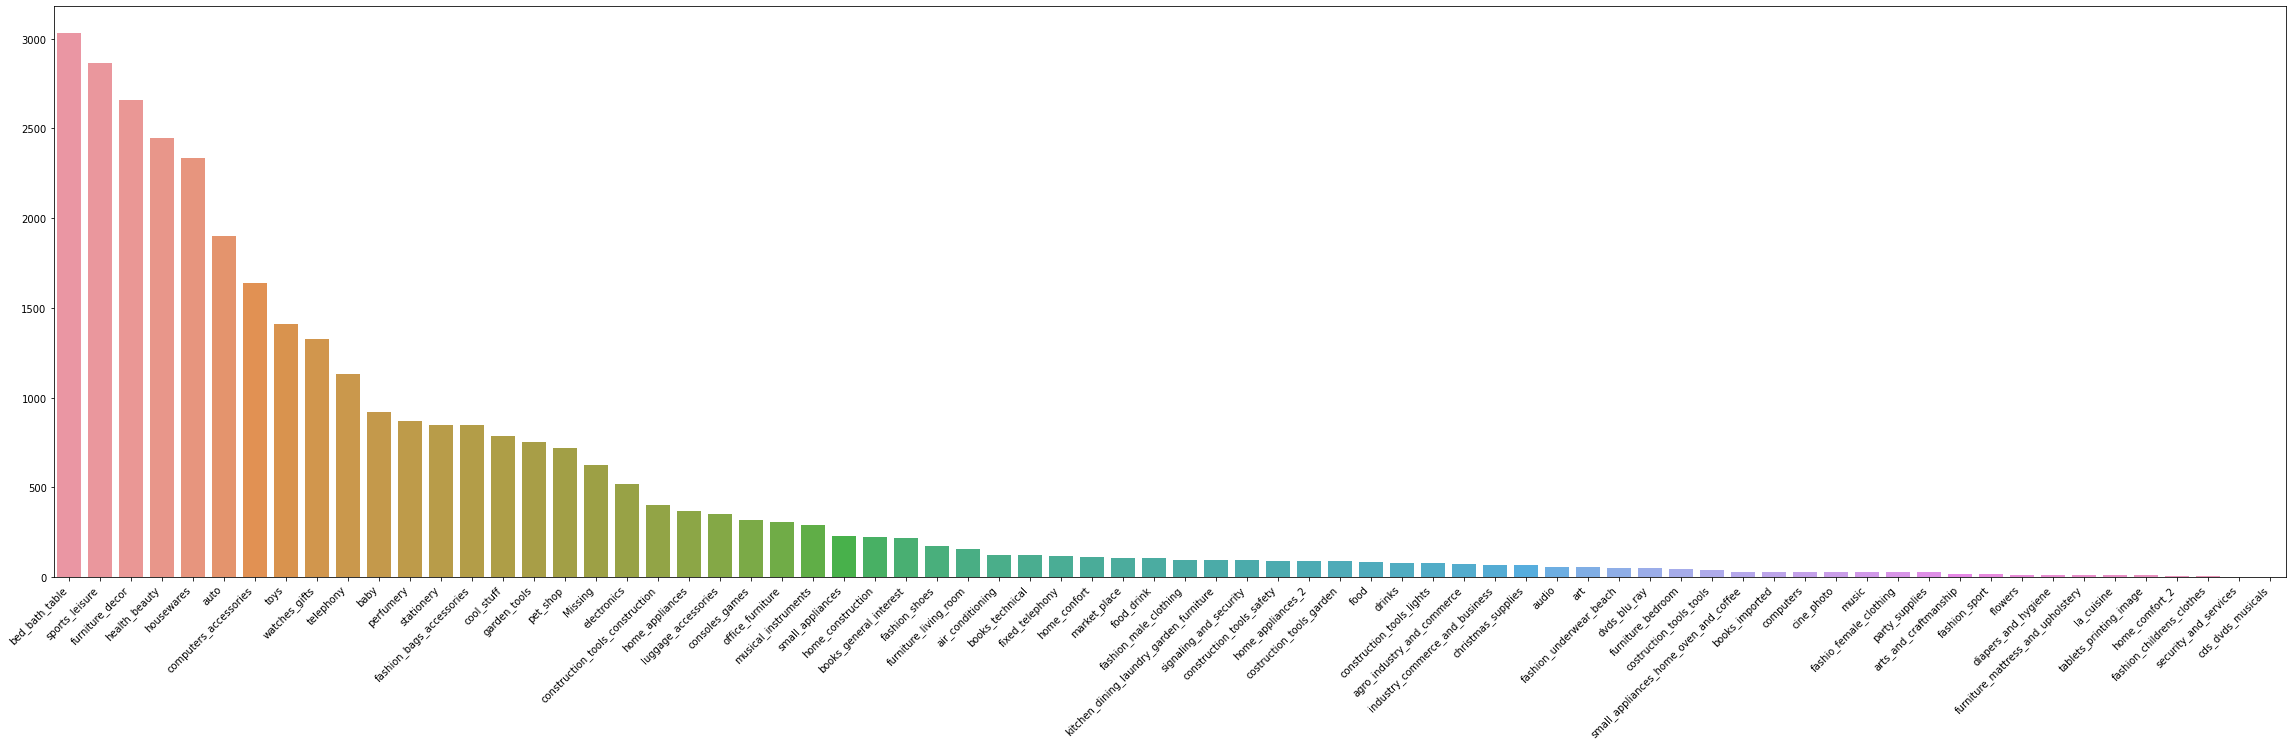

In [0]:
#Distribution of product categories
fig = plt.gcf()
fig.set_size_inches(40, 10.5)
sns.barplot(products['product_category_eng'].value_counts(dropna=False).keys().tolist(), products['product_category_eng'].value_counts(dropna=False).tolist())
plt.xticks(rotation = 45, ha='right')

In [0]:
#Number of sellers
print('Number of retailers: ', seller.drop_duplicates().shape[0])

Number of sellers:  3095


In [0]:
#Number of products
print('Number of products: ', products['product_id'].drop_duplicates().shape[0])

Number of products:  32951


## Value proposition

Olist is focused on increasing the number of sellers using their platform. Retailers, on the other hand, are interested in maximizing their online sales to compensate for the 20% markup and recurring monthly fees. However, the more sellers, the higher the competition and the lower the turnover for individual retailers. Consequently, if the objective is to grow the seller base, it will be vital to optimize product marketing to reach as many potential buyers as possible.  

Based on the here discussed analysis, the first proposed strategy is to improve product offerings, delivery periods and payment options to enhance the competitiveness of retailers.

Second, it might be beneficial to target retailers involved in selling furniture and houseware related products, since a majority of sold items fall into these categories.

Third, consumer spending can be increased through demographic insights and effective targeting. The increase in spending should attract new sellers while also enhancing data generation. New sources for the acquisition of demographic data would need to be considered.

Fourth, segmentation can uncover dominant characteristics of retailers and buyers that actively use the platform. More complete data is required for this type of analysis.